In [20]:
import importlib

import bnpy
import numpy as np
import os
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from hmmlearn.hmm import GaussianHMM
from bnpy import HModel
import time
from sklearn.utils import check_random_state
from importlib import reload

In [21]:
features_info = pickle.load(open(r'/Users/david/Documents/mastersCode/ubm/final/tests/get_features/cv_output_all_whales_log_power_avg_3.pkl', 'rb'))
cv_data = features_info['cv_output']
label_map = features_info['label_map']
num_map = features_info['num_map']

In [23]:
import utils as utils
importlib.reload(utils)

ns = np.arange(2,25,1) # np.arange(9,10,1) # [5,10,15,20,25] # [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] # [5,6,7,8,9,10,15,20] # [5,10,15,20,25] # ['5','10','15','20','25','30'] # state count
# ns[0] = 1
model_types = ['hmmlearn'] # ['vi_fin_bnpy'] # ['vi_inf_bnpy'] # 'hmmlearn','em_bnpy', 'vi_fin_bnpy',
whale_types = [key for key in num_map]

testing_kwargs = dict(
    n_inits = np.arange(0,10,1),
    cv_amt = 2 # len(cv_data['train_data'][0]),
    )

init_kwargs = dict(
initname='randexamples',
    )

alg_kwargs = dict(
    nLap=100, # 150
    nTask=1, nBatch=1, convergeThr=0.001, # 0.0001
    )
hdphmm_kwargs = dict(
    startAlpha = 2.0,       # top-level Dirichlet concentration parameter
    transAlpha = 10,        # trans-level Dirichlet concentration parameter
    gamma = 10,
    hmmKappa = 10,
    )
gauss_kwargs = dict(
    sF = 1,          # Set prior so E[covariance] = identity
    ECovMat = 'eye',
    )

chosen_whales = whale_types # [3] # whale_types # [0,1]
hmm_kwargs = [init_kwargs, alg_kwargs, hdphmm_kwargs, gauss_kwargs]

In [ ]:
results = utils.get_all_results(model_types, ns, chosen_whales, cv_data, testing_kwargs, hmm_kwargs)

# 'hmmlearn', 'em_bnpy', 'vi_fin_bnpy',
# data_temp = hmm_data['train_data'][0][0]
# print('loc: ', loc)

In [37]:
# load results

load_results = True
type = 'inf'
model_types = None

results = pickle.load(open(r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/' + type + '_results.pkl', 'rb'))

if type == 'em': model_types = ['hmm_learn']
if type == 'fin': model_types = ['vi_fin_bnpy']
if type == 'inf': model_types = ['vi_inf_bnpy']


HPB
SRW
BRD
BWH
SPM
NOISE


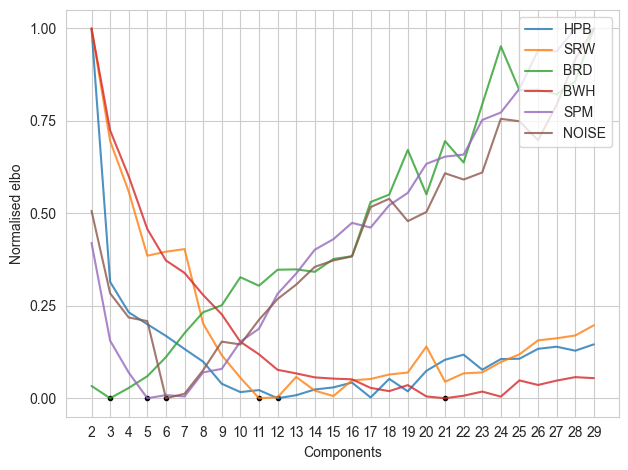

In [38]:
# for bnpy
# select min elbo
# // For bnpy // // //
def normalise_before_plot(some_arr):
    y1 = np.array(np.copy(some_arr))
    return (y1 - np.min(y1)) / (np.max(y1) - np.min(y1))

ns_components = None
for results_key in results:
    ns_components = [key for key in results[results_key][model_types[0]]['components']]
    pass

best_model_per_whale = {}

colors = ['blue', 'orange']
colors_b = ['darkblue', 'darkorange']

fig, ax = plt.subplots()
fig.tight_layout()

# chosen_whales = [0,1,2,3,4,5]

for whale_key in chosen_whales:

    print(num_map[whale_key])

    whale_results = results[whale_key]
    model_results = whale_results[model_types[0]]
    components_results = model_results['components']

    val = [components_results[some_key]['avg_val'] for some_key in components_results]
    test = [components_results[some_key]['test'] for some_key in components_results]
    elbos = [np.mean(components_results[some_key]['elbos']) for some_key in components_results]

    normalised_elbos = normalise_before_plot(elbos)

    diffs = []
    for i in range(len(elbos) - 1):
        diffs.append(elbos[i] - elbos[i+1])

    min_elbo = np.min(normalise_before_plot(elbos))
    arg_min_elbo = np.argmin(elbos) + ns[0]
    arg_min_components = (components_results[arg_min_elbo])
    arg_min_elbo_components = np.argmin(arg_min_components['elbos'])
    best_model = arg_min_components['models'][arg_min_elbo_components]

    best_model_per_whale[num_map[whale_key]] = best_model

    # ax.plot(ns, normalise_before_plot(elbos), label=num_map[whale_key], alpha=0.8)

    ax.plot(ns_components, normalise_before_plot(elbos), label=num_map[whale_key], alpha=0.8)
    # ax.plot(ns, normalise_before_plot(elbos), label=num_map[whale_key], alpha=0.8)
    plt.scatter(arg_min_elbo, min_elbo, color='black', marker='.')

    # plt.scatter(arg_min_elbo, min_elbo, color='black', marker='.')

ax.legend(handles=ax.lines, loc='upper right')
# ax.set_title("HMM VI Finite Validate/Test")
ax.set_ylabel("Normalised elbo")
ax.set_xlabel("Components")
all_axes = fig.get_axes()
for axis in all_axes:
    legend = axis.get_legend()
    if legend is not None:
        legend.remove()
        all_axes[-1].add_artist(legend)
fig.tight_layout()
plt.xticks(ns_components)
plt.show()

# ax.set_ylabel("Normalised elbo")
# plt.xlabel('Components')
# plt.legend()

# fig.tight_layout()
# plt.show()


HPB


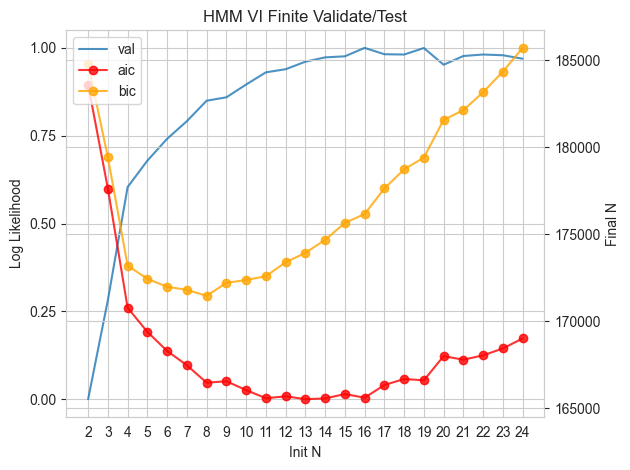

SRW


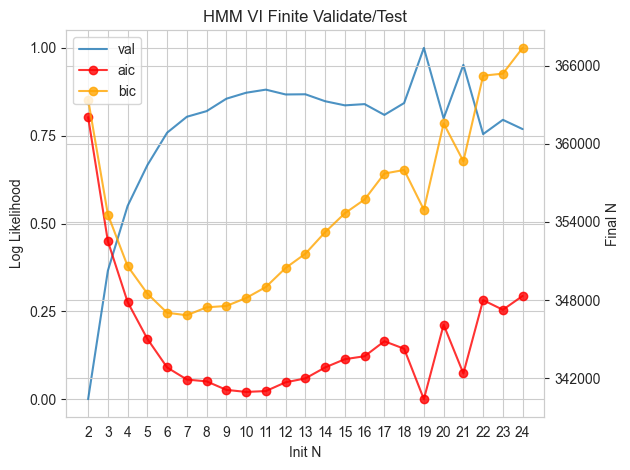

BRD


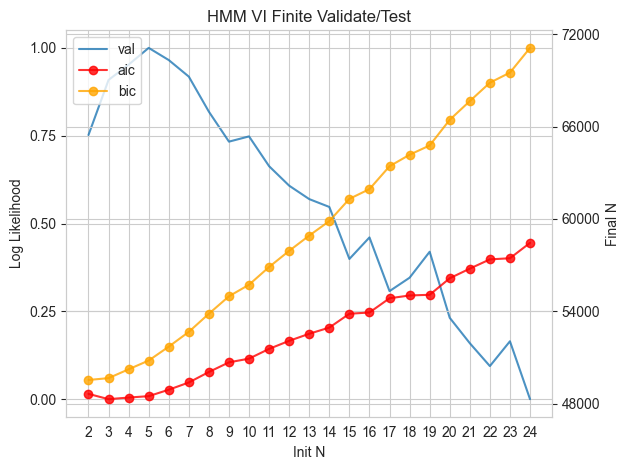

BWH


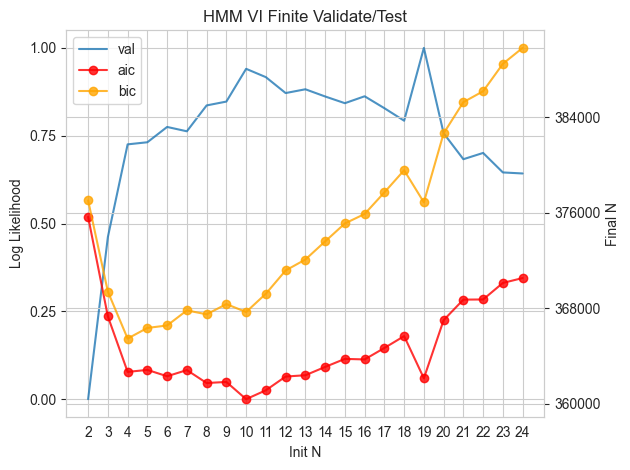

SPM


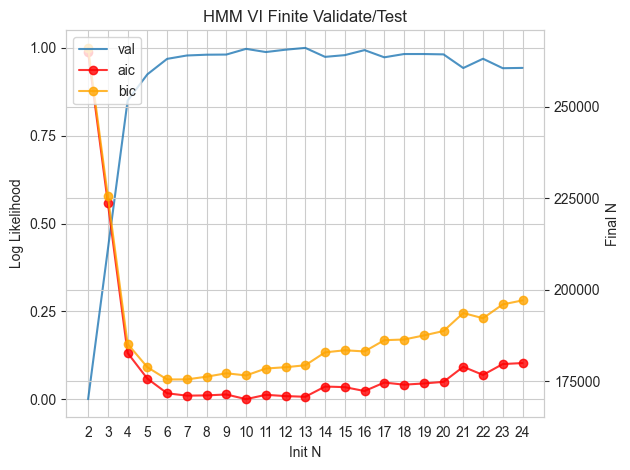

NOISE


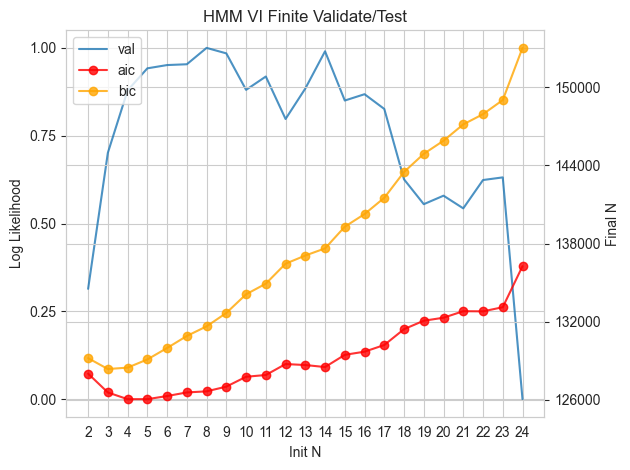

In [17]:
# // select // min elbo
# // For EM //
def normalise_before_plot(some_arr):
    y1 = np.array(np.copy(some_arr))
    return (y1 - np.min(y1)) / (np.max(y1) - np.min(y1))

best_model_per_whale = {}

colors = ['blue', 'orange']
colors_b = ['darkblue', 'darkorange']

best_models = {
    'HPB': 14,
    'SRW': 10,
    'BRD': 5,
    'BWH': 10,
    'SPM': 6,
    'NOISE': 4
}

for whale_key in results:

    whale_results = results[whale_key]

    print(num_map[whale_key])

    model_results = whale_results[model_types[0]]
    components_results = model_results['components']

    fig, ax = plt.subplots()
    fig.tight_layout()
    ax2 = ax.twinx()

    val = [components_results[some_key]['avg_val'] for some_key in components_results]
    test = [components_results[some_key]['test'] for some_key in components_results]
    aic = [components_results[some_key]['aic'] for some_key in components_results]
    bic = [components_results[some_key]['bic'] for some_key in components_results]

    best_model_key = best_models[num_map[whale_key]]
    best_model = components_results[best_model_key]['best_model']
    best_model_per_whale[num_map[whale_key]] = best_model # should be max model

    # elbos = [np.nanmin(components_results[some_key]['elbos']) for some_key in components_results]

    # min_elbo = np.min(normalise_before_plot(elbos))
    # arg_min_elbo = np.argmin(elbos) + ns[0]
    # best_model_per_whale[num_map[whale_key]] = (components_results[arg_min_elbo]['models'][0])  # should be max model

    # ax.plot(ns, normalise_before_plot(elbos), label=num_map[whale_key], alpha=0.8)

    # ax.plot(ns, normalise_before_plot(test), label='test', alpha=0.8)
    ax2.plot(ns, aic, label='aic', marker='o', c='red', alpha=0.8)
    ax.plot(ns, normalise_before_plot(val), label='val', alpha=0.8)
    ax2.plot(ns, bic, label='bic', marker='o', c='orange', alpha=0.8)

    # plt.scatter(arg_min_elbo, min_elbo, color='black', marker='.')

    ax.legend(handles=ax.lines + ax2.lines, loc='upper left')
    ax.set_title("HMM VI Finite Validate/Test")
    ax.set_ylabel("Log Likelihood")
    ax2.set_ylabel("Final N")
    ax.set_xlabel("Init N")
    all_axes = fig.get_axes()
    for axis in all_axes:
        legend = axis.get_legend()
        if legend is not None:
            legend.remove()
            all_axes[-1].add_artist(legend)
    fig.tight_layout()
    plt.xticks(ns)
    plt.show()

    # ax.set_ylabel("Normalised elbo")
    # plt.xlabel('Components')
    # plt.legend()

    # fig.tight_layout()
    # plt.show()


In [39]:
output = open('new_result_models' + ".pkl", "wb")
pickle.dump(best_model_per_whale, output)
output.close()

In [38]:
# compare times from results
import pickle
mfcc = True
if mfcc:
    trained_hmms_inf_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/inf_results.pkl'
    trained_hmms_fin_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/fin_results.pkl'
    trained_hmms_em_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/mfcc/em_results.pkl'
    trained_hmms_wl_inf = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/mfcc/wl_inf_results.pkl'
    trained_hmms_bhmm = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/mfcc/bhmm_results.pkl'
else:
    trained_hmms_inf_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/inf_results.pkl'
    trained_hmms_fin_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/fin_results.pkl'
    trained_hmms_em_results_path = r'/Users/david/Documents/mastersCode/bnpy/bnpy/examples/08_mocap6/whale_results/log-power/em_results.pkl'
    trained_hmms_wl_inf = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/log_power/wl_inf_results.pkl'
    trained_hmms_bhmm = r'/Users/david/Documents/mastersCode/ubm/final/models/hdphmm/bhmm/testing/log_power/bhmm_results.pkl'


In [39]:
results_trained_hmms_inf = pickle.load(open(trained_hmms_inf_results_path, 'rb'))
results_trained_hmms_fin = pickle.load(open(trained_hmms_fin_results_path, 'rb'))
results_trained_hmms_em = pickle.load(open(trained_hmms_em_results_path, 'rb'))
# results_trained_hmms_wl_inf = pickle.load(open(trained_hmms_wl_inf, 'rb'))
# results_trained_hmms_bhmm = pickle.load(open(trained_hmms_bhmm, 'rb'))

In [40]:
import numpy as np

def get_complete_time(some_results):
    temp_model_key = ''
    times = []
    for some_whale_key in some_results:
        some_whale_results = some_results[some_whale_key]
        for some_model_key in some_results[some_whale_key]:
            temp_model_key = some_model_key
            some_model_results = some_whale_results[some_model_key]
            times.append(some_model_results['total_time'])
    return temp_model_key, np.sum(times)


print(get_complete_time(results_trained_hmms_inf))
print(get_complete_time(results_trained_hmms_fin))
print(get_complete_time(results_trained_hmms_em))

        # comp_results = some_results[0]['vi_inf_bnpy']['components']
        # for comp in comp_results:
        #     times.append(np.sum(comp_results[comp]['time']))
    # print(comp)
# np.sum(times)

('vi_inf_bnpy', 937.6512837409973)
('vi_fin_bnpy', 935.6116554737091)
('hmmlearn', 341.7643144130707)


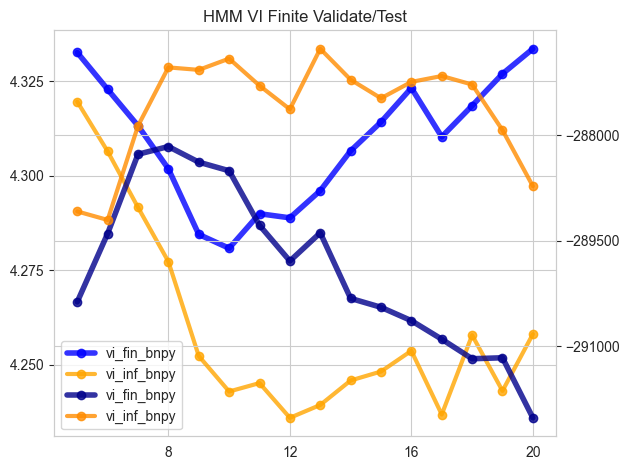

In [5]:
# ns = [20,25,30,35,40]
fig, ax = plt.subplots()
colors = ['blue', 'orange']
colors_b = ['darkblue', 'darkorange']
fig.tight_layout()
line_width = 5
ax2 = ax.twinx()

for key in results:

    line_width -= 1
    # if key != 'em_bnpy':
    components_results = results[key]['components']
    # avg_times = [np.mean(components_results[some_key]['time']) for some_key in components_results]
    # std_times = [np.std(components_results[some_key]['time']) for some_key in components_results]
    test = [components_results[some_key]['test'] for some_key in components_results]
    val = [components_results[some_key]['avg_val'] for some_key in components_results]

    elbos = [np.nanmin(components_results[some_key]['elbos']) for some_key in components_results]
    final_components = [np.min(components_results[some_key]['final_components']) for some_key in components_results]

    # ax.plot(ns, test, label=key, marker='o')
    # ax.plot(ns, val, label=key, marker='o')
    ax.plot(ns, elbos, label=key, marker='o', c=colors[model_types.index(key)], linewidth=line_width, alpha=0.8)

    ax2.plot(ns, test, label=key, marker='o', c=colors_b[model_types.index(key)], linewidth=line_width, alpha=0.8)

    # if not np.any(np.array(elbos) == 0):
    #     ax.plot(ns, elbos, label=key, marker='o', )
    # # ax2.set_ylim(0,15)
    # # ax2.set_yticks(np.arange(0,15,1))
    #
    # ax3 = ax.twinx()
    # ax3.plot(ns, elbo, label='Elbo', marker='o', color='green')
    # ax3.set_ylabel("Elbo")
    # ax3.spines['right'].set_position(('outward', 60))

ax.legend(handles=ax.lines + ax2.lines)
ax.set_title("HMM VI Finite Validate/Test")
all_axes = fig.get_axes()
for axis in all_axes:
    legend = axis.get_legend()
    if legend is not None:
        legend.remove()
        all_axes[-1].add_artist(legend)
fig.tight_layout()
plt.show()

# ax.set_ylabel("Test")
# # ax2.set_ylabel("Gradient")
# # plt.title('HMM EM Validate/Test')
# plt.xlabel('States')
# # plt.ylabel('Score')
# plt.legend()
# fig.tight_layout()
# plt.show()

In [38]:
## infinite with merge moves

goodelbopairs_merge_kwargs = dict(
    m_startLap = 10,
    # Set limits to number of merges attempted each lap.
    # This value specifies max number of tries for each cluster
    m_maxNumPairsContainingComp = 5,
    # Set "reactivation" limits
    # So that each cluster is eligible again after 10 passes thru dataset
    # Or when it's size changes by 400%
    m_nLapToReactivate = 10,
    m_minPercChangeInNumAtomsToReactivate = 400 * 0.01,
    # Specify how to rank pairs (determines order in which merges are tried)
    # 'obsmodel_elbo' means rank pairs by improvement to observation model ELBO
    m_pair_ranking_procedure = 'obsmodel_elbo',
    m_pair_ranking_direction = 'descending',
    )

init_kwargs = dict(
    K=30,
    initname='randexamples',
    )

alg_kwargs = dict(
    nLap=100,
    nTask=1, nBatch=1, convergeThr=0.0001,
    )

hdphmm_kwargs = dict(
    startAlpha = 2.0,       # top-level Dirichlet concentration parameter
    transAlpha = 0.5,  # trans-level Dirichlet concentration parameter
    hmmKappa = 10,
    )

gauss_kwargs = dict(
    sF = 1,          # Set prior so E[covariance] = identity
    ECovMat = 'eye',
    )

# run VI on infinite HMM

aic_inf_merge = []
bic_inf_merge = []
lls_inf_merge = []
lls_elbo_inf_merge = []

best_ll = None
best_model = None
best_model_hmmlearn = None
best_elbo = None
best_model_info = None
all_elbos = []
all_ks = []
whale_label = label_map['BWH']
# print('calculating for n: ', n)
for cv_index in range(len(cv_data['train_data'])):
    train_for_whale = utils.filter_data_with_labels(cv_data['train_data'][cv_index],cv_data['train_label'][cv_index], whale_label)
    train_for_whale_bnpy = utils.get_GroupXData_from_list(train_for_whale)
    val_for_whale = utils.filter_data_with_labels(cv_data['val_data'][cv_index],cv_data['val_label'][cv_index], whale_label)

    # curr_train = cv_data['train_data'][cv_index]
    # curr_train_GroupXData = utils.get_GroupXData_from_list(curr_train)
    # curr_val = cv_data['val_data'][cv_index]
    for i in [1]:
        goodelbopairs_trained_model, goodelbopairs_info_dict = bnpy.run(
            train_for_whale_bnpy, 'HDPHMM', 'DiagGauss', 'memoVB',
            output_path='/tmp/mocap6/trymerge-K=20-model=HDPHMM+DiagGauss-ECovMat=1*eye-merge_strategy=good_elbo_pairs/',
            moves='merge,shuffle',
            **dict(
                sum(map(list,   [alg_kwargs.items(),
                                init_kwargs.items(),
                                hdphmm_kwargs.items(),
                                gauss_kwargs.items(),
                                goodelbopairs_merge_kwargs.items()]),[])))

        elbo = goodelbopairs_info_dict['loss']
        # all_elbos.append(elbo)
        # all_ks.append(goodelbopairs_trained_model.obsModel.K)
        curr_hmm = utils.get_hmm_learn_from_bnpy(goodelbopairs_trained_model)
        score = curr_hmm.score(np.concatenate(val_for_whale))
        if not best_elbo or elbo < best_elbo:
            # best_ll = score
            best_model = goodelbopairs_trained_model
            best_model_info = goodelbopairs_info_dict
            best_model_hmmlearn = curr_hmm
# aic_inf_merge.append(best_model.aic(np.concatenate(curr_test)))
# bic_inf_merge.append(best_model.bic(np.concatenate(curr_test)))
# lls_inf_merge.append(best_model.score(np.concatenate(curr_test)))
# lls_elbo_inf_merge.append(best_elbo)

Dataset Summary:
GroupXData
  total size: 13 units
  batch size: 13 units
  num. batches: 1
Allocation Model:  None
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 67  ...
  beta = [ 65  65]  ...
  Expectations
  E[  mean[k]] = 
  [ 0  0] ...
  E[ covar[k]] = 
  [[1. 0.]
   [0. 1.]] ...
Initialization:
  initname = randexamples
  K = 30 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/mocap6/trymerge-K=20-model=HDPHMM+DiagGauss-ECovMat=1*eye-merge_strategy=good_elbo_pairs/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
    1.000/100 after      0 sec. |   1459.0 MiB | K   30 | loss  1.936782963e+00 |  
MERGE @ lap 2.00: Disabled. Waiting for lap >= 10 (--m_startLap).
    2.000/100 after      0 sec. |   1459.1 MiB | K 

KeyboardInterrupt: 

In [9]:
output = open('results_em_bnpy_hb' + ".pkl", "wb")
pickle.dump(results_em_bnpy, output)
output.close()

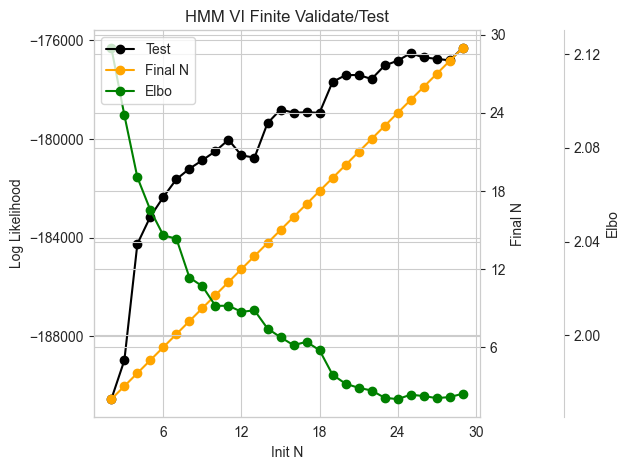

In [21]:
components_results = results_vi_finite['components']
color1, color2, color3 = plt.cm.viridis([0, .5, .9])

avg_val_ll = [components_results[some_key]['avg_val'] for some_key in components_results]
test_ll = [components_results[some_key]['test'] for some_key in components_results]
final_components = [components_results[some_key]['final_components_mean'] for some_key in components_results]
elbo = [components_results[some_key]['elbo'] for some_key in components_results]

fig, ax = plt.subplots()

# ax.plot(ns, avg_val_ll, color='blue', label='Val', marker='o')
ax.plot(ns, test_ll, color='black', label='Test', marker='o')

ax2 = ax.twinx()
ax2.plot(ns, final_components, color='orange', label='Final N', marker='o')
# ax2.set_ylim(0,15)
# ax2.set_yticks(np.arange(0,15,1))

ax3 = ax.twinx()
ax3.plot(ns, elbo, label='Elbo', marker='o', color='green')
ax3.set_ylabel("Elbo")
ax3.spines['right'].set_position(('outward', 60))
# ax3.set_ylim(-0.1,0.15)

ax.legend(handles=ax.lines + ax2.lines + ax3.lines)
ax.set_title("HMM VI Finite Validate/Test")
ax.set_ylabel("Log Likelihood")
ax2.set_ylabel("Final N")
ax.set_xlabel("Init N")
all_axes = fig.get_axes()
for axis in all_axes:
    legend = axis.get_legend()
    if legend is not None:
        legend.remove()
        all_axes[-1].add_artist(legend)
fig.tight_layout()
plt.show()

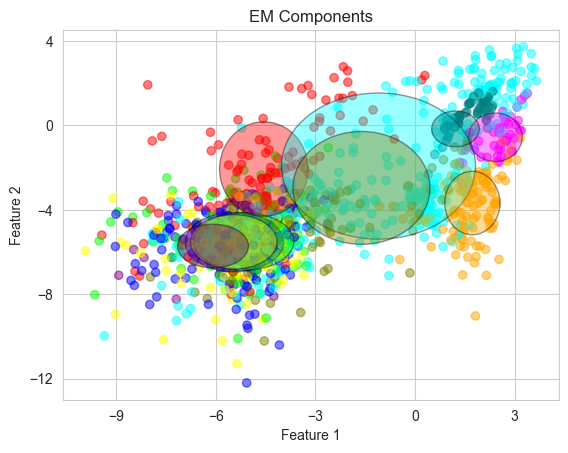

score:  -179102.0733944728


In [25]:
from bnpy import plot_hmm
reload(plot_hmm)
hmm_temp = results_vi_inf['components'][11]['models'][0]
plot_hmm.plot_hmm_data(np.concatenate(curr_test), hmm_temp.predict(np.concatenate(curr_test)), hmm_temp.n_components, hmm_temp.means_, hmm_temp.covars_, feature_a=8, feature_b=9, legend=False, title='EM Components')
print('score: ', hmm_temp.score(np.concatenate(curr_test)))

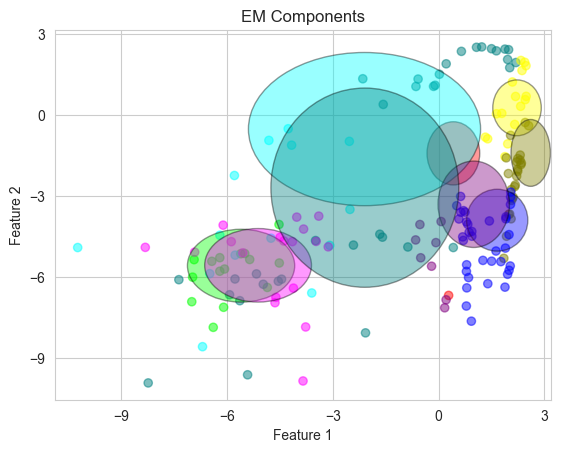

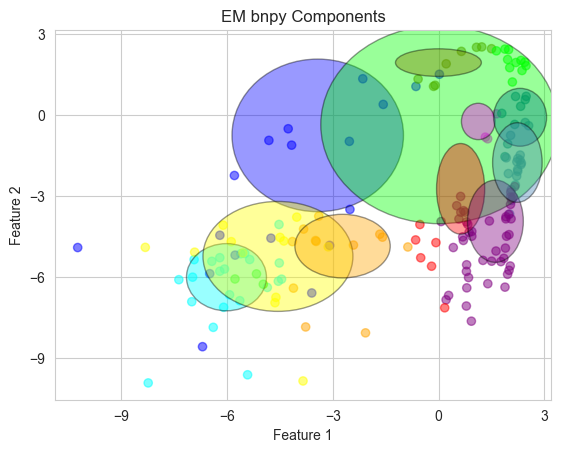

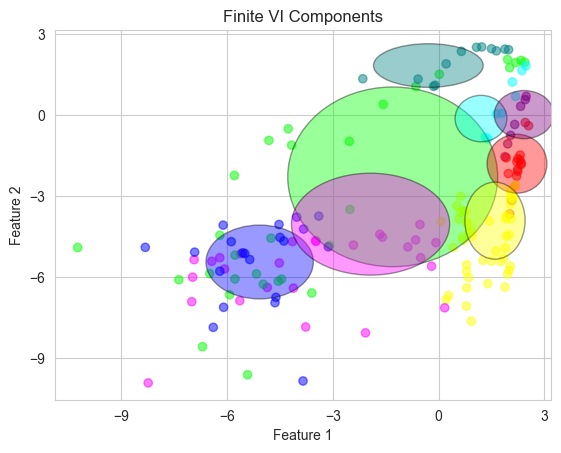

22


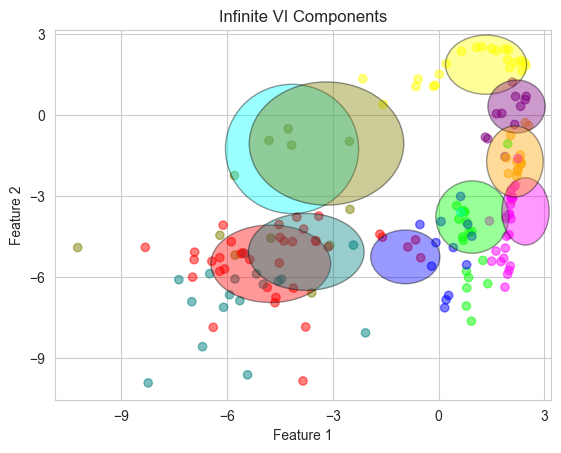

In [32]:

data_temp = hmm_data['train_data'][0][0]
feature_a = 8
feature_b = 9

temp = np.argmax([results_em['components'][some_key]['test'] for some_key in results_em['components']])
hmm_temp = results_em['components'][16+2]['models'][1]
plot_hmm.plot_hmm_data(data_temp, hmm_temp.predict(data_temp), hmm_temp.n_components, hmm_temp.means_, hmm_temp.covars_, feature_a=feature_a, feature_b=feature_b, legend=False, title='EM Components')

temp = np.argmax([results_em_bnpy['components'][some_key]['test'] for some_key in results_em_bnpy['components']])
hmm_temp = results_em_bnpy['components'][16+2]['models'][1]
plot_hmm.plot_hmm_data(data_temp, hmm_temp.predict(data_temp), hmm_temp.n_components, hmm_temp.means_, hmm_temp.covars_, feature_a=feature_a, feature_b=feature_b, legend=False, title='EM bnpy Components')

temp = np.argmax([results_vi_finite['components'][some_key]['test'] for some_key in results_em['components']])
hmm_temp = results_vi_finite['components'][13+2]['models'][0]
plot_hmm.plot_hmm_data(data_temp, hmm_temp.predict(data_temp), hmm_temp.n_components, hmm_temp.means_, hmm_temp.covars_, feature_a=feature_a, feature_b=feature_b, percent=1, legend=False, title='Finite VI Components')

temp = np.argmax([results_vi_inf['components'][some_key]['test'] for some_key in results_em['components']])
print(temp)
hmm_temp = results_vi_inf['components'][17+2]['models'][1]
plot_hmm.plot_hmm_data(data_temp, hmm_temp.predict(data_temp), hmm_temp.n_components, hmm_temp.means_, hmm_temp.covars_, feature_a=feature_a, feature_b=feature_b, percent=1, legend=False, title='Infinite VI Components')


Dataset Summary:
GroupXData
  total size: 12 units
  batch size: 12 units
  num. batches: 1
Allocation Model:  None
Obs. Data  Model:  Gaussian with diagonal covariance.
Obs. Data  Prior:  independent Gauss-Wishart prior on each dimension
  Wishart params 
    nu = 67  ...
  beta = [ 65  65]  ...
  Expectations
  E[  mean[k]] = 
  [ 0  0] ...
  E[ covar[k]] = 
  [[1. 0.]
   [0. 1.]] ...
Initialization:
  initname = randexamples
  K = 30 (number of clusters)
  seed = 1607680
  elapsed_time: 0.0 sec
Learn Alg: memoVB | task  1/1 | alg. seed: 1607680 | data order seed: 8541952
task_output_path: /tmp/mocap6/trymerge-K=20-model=HDPHMM+DiagGauss-ECovMat=1*eye-merge_strategy=good_elbo_pairs/1
MERGE @ lap 1.00: Disabled. Cannot plan merge on first lap. Need valid SS that represent whole dataset.
    1.000/100 after      0 sec. |   1089.8 MiB | K   30 | loss  1.269190620e+00 |  
MERGE @ lap 2.00: Disabled. Waiting for lap >= 10 (--m_startLap).
    2.000/100 after      0 sec. |   1089.8 MiB | K 

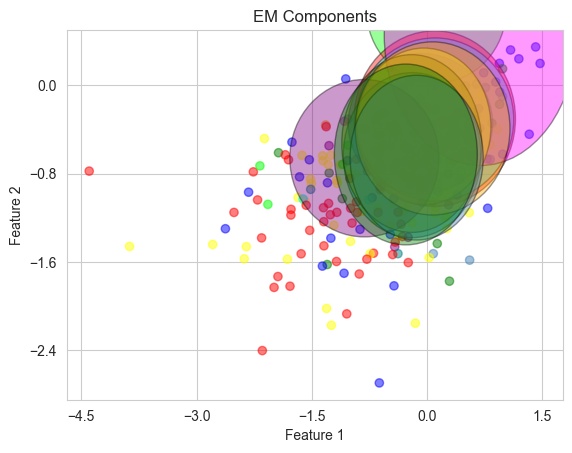

In [46]:
data_temp = hmm_data['train_data'][0][0]
best_model_hmmlearn.score(data_temp)
plot_hmm.plot_hmm_data(data_temp, best_model_hmmlearn.predict(data_temp), best_model_hmmlearn.n_components, best_model_hmmlearn.means_, best_model_hmmlearn.covars_, feature_a=5, feature_b=6, legend=False, title='EM Components')